In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
#Reading the Dataset
#Load the previously pre-processed dataset saved in the CSV file "data_refined.csv" into a Pandas DataFrame.

df = pd.read_csv("data_refined.csv")
df



,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [71]:
#Feature Selection
#Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.
#One of the simplest approaches is choosing the features with the highest correlation to the target data.
#The label, in this case, is the 'Diagnosed' column.
#The Diagnosed column has two distinct values:
#M: Malignant Tumor
#B: Benign Tumor
#Calculate the correlation of all the features to their target labels.
#Choose the most correlated features above a certain limit for training.



columns = ['Unnamed: 0','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



correlation = df[columns].corrwith(df["diagnosis"])

columns_to_be_dropped = []

for i in range(len(correlation)):
    if ((correlation[i]) < 0.70):
        columns_to_be_dropped.append(columns[i])

df_processed = df.drop(columns_to_be_dropped,axis = 1)



df_processed


,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,1.097064,1.269934,0.984375,2.532475,1.886690,2.303601,2.001237,2.296076
1,1,1.829821,1.685955,1.908708,0.548144,1.805927,1.535126,1.890489,1.087084
2,1,1.579888,1.566503,1.558884,2.037231,1.511870,1.347475,1.456285,1.955000
3,1,-0.768909,-0.592687,-0.764464,1.451707,-0.281464,-0.249939,-0.550021,2.175786
4,1,1.750297,1.776573,1.826229,1.428493,1.298575,1.338539,1.220724,0.729259
...,...,...,...,...,...,...,...,...,...
564,1,2.110995,2.060786,2.343856,2.320965,1.901185,1.752563,2.015301,1.629151
565,1,1.704854,1.615931,1.723842,1.263669,1.536720,1.421940,1.494959,0.733827
566,1,0.702284,0.672676,0.577953,0.105777,0.561361,0.579001,0.427906,0.414069
567,1,1.838341,1.982524,1.735218,2.658866,1.961239,2.303601,1.653171,2.289985


In [85]:

#Output a list of important feature names.
#Splitting the Data
#Split your data as follows:
#80% training set.
#10% validation set.
#10% test set.




y = df_processed["diagnosis"].values
#X = df_processed.iloc[:, 1:].values
X = df[[ 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst']].values

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=1)




In [86]:
#Training Classifiers
#We use CSS in many of our day-to-day tasks. In real life, we may use a form to complete a survey or to register for an activity. In the technical world, however, forms can be used to schedule an appointment online, log in to a website, or even give feedback on a certain platform.
#Use KNN classifier, random forest classifier, and support vector classifier (SVC) models to train your data.
#Train your full features dataset and your reduced set features dataset.
#Get accuracy scores and confusion matrices for both.
#You need a minimum accuracy score of 94%
#Compare the results.
#Hint: you need to choose the optimal value for k using cross-validation.

df_processed.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

# KNN 

best value of k is: 3
KNN final accuracy score : 0.9473684210526315
KNN Confusion Matrix:
[[33  0]
 [ 3 21]]


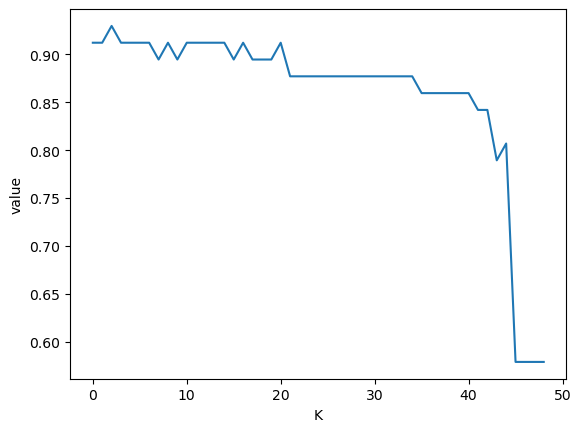

In [87]:
accuracy = []

for k in range(1,50):
    model_temp = KNeighborsClassifier(n_neighbors=k).fit(X_val, y_val)
    accuracy.append(model_temp.score(X_test, y_test))
    
#print("accuracy scores",accuracy)

plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('value')

best_k_value = accuracy.index(max(accuracy))+1
print("best value of k is:",best_k_value)




knn_model =  KNeighborsClassifier(n_neighbors=best_k_value).fit(X_train, y_train)

knn_pred= knn_model.predict(X_test)

f_accuracy_score = knn_model.score(X_test, y_test)
print("KNN final accuracy score :",f_accuracy_score)

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))



# Random Forest

In [95]:
accuracy_score2 = []

for i in range(1,4):
    model_temp2 = RandomForestClassifier(criterion='entropy',random_state=0,n_estimators = i*100).fit(X_val, y_val)
    accuracy_score2.append(model_temp2.score(X_test, y_test))
    

best_n_estimator = (accuracy_score2.index(max(accuracy_score2))+1)*100
print("best value of n is:",best_n_estimator)


rfc_model = RandomForestClassifier(criterion= 'entropy',random_state=1, n_estimators = best_n_estimator).fit(X_train,y_train)

rfc_pred= rfc_model.predict(X_test)

rfc_accuracy_score = rfc_model.score(X_test, y_test)
print("final accuracy score :",rfc_accuracy_score)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))


best value of n is: 100
[0.9122807017543859, 0.9122807017543859, 0.9122807017543859]
final accuracy score : 0.9473684210526315
Confusion Matrix:
[[33  0]
 [ 3 21]]


# SVC

In [89]:
SVC_accuracy=[]

for c in range(1,5):
    
    model_temp3 = SVC(kernel = "linear", C= c, gamma = "auto", random_state = 0).fit(X_val, y_val)
    
    SVC_accuracy.append(model_temp3.score(X_test, y_test))
    
best_c_value = SVC_accuracy.index(max(SVC_accuracy))+1
print("best value of c is:",best_c_value)    
    
    
svc_model = SVC(kernel = "linear", C= best_c_value, gamma = "auto", random_state = 0).fit(X_train,y_train)

    
print("SVC_accuracy:",svc_model.score(X_test,y_test))
    
svc_pred = svc_model.predict(X_test)
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))


best value of c is: 4
SVC_accuracy: 0.9473684210526315
SVC Confusion Matrix:
[[33  0]
 [ 3 21]]


In [90]:
#Challenge Yourself
#Find another way to reduce the set of features.
#Implement your classification using the new reduced set of features.
